# 3.5 Classifying newswires: a multiclass classification example


## 3.5.1 The Reuters dataset


In [1]:
from tensorflow.keras.datasets import reuters

# Importing the data to training and testing sets
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\hotal\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\hotal\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
# Number of observations in the training data
len(train_data)

8982

In [3]:
# Number of observations in the testing data
len(test_data)

2246

In [4]:
# Printing an example from the dataset
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [5]:
# Getting the word dictionary from the dataset
word_index = reuters.get_word_index()

# Reversing the dictionary for easier indexing
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

# Building a review using the training array and the reversed dictionary
decoded_review = ' '.join([reverse_word_index.get(i - 3 , '?') for i in train_data[0]])

# Printing the review
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
# Checking the number of topics in the training set
len(set(train_labels))

46

## 3.5.2 Preparing the data

In [7]:
import numpy as np

# Convert the training arrays into a 2D array with the columns representing the words used.
def vectorize_sequence(sequences, dimensions = 10000):
    """
    Return a 2D array with the columns representing the word usage of each entry.
    Parameters
    ----------
    sequences : array_like
        Array representing the word usage in each entry
    dimensions : data-type, optional
        Number of columns in the 2D array
    """

    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [8]:
# Vectorize the training and testing datasets
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [9]:
def to_one_hot(labels):
    """
    Return a hot-encoded 2D array.
    Parameters
    ----------
    sequences : array_like
        Array representing the classifications of each article from Reuters
    """
    dimension = len(set(labels))
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [10]:
# Hot-encode the target attributes
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

## 3.5.3 Building your network

In [11]:
from keras import models, layers

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(layers.Dense(64, activation = 'relu')) 
model.add(layers.Dense(len(set(train_labels)), activation = 'softmax'))

In [13]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 3.5.4 Validating your approach

In [14]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [15]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 119ms/step - loss: 3.0578 - accuracy: 0.4115 - val_loss: 1.6931 - val_accuracy: 0.6440
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 1.4824 - accuracy: 0.6921 - val_loss: 1.3045 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.1117 - accuracy: 0.7502 - val_loss: 1.1543 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8750 - accuracy: 0.8150 - val_loss: 1.0740 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.6888 - accuracy: 0.8491 - val_loss: 0.9937 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 1s 34ms/step - loss: 0.5788 - accuracy: 0.8795 - val_loss: 0.9352 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 0.4397 - accuracy: 0.9098 - val_loss: 0.9279 - val_accuracy: 0.8130
Epoch 8/20
1

In [16]:
import matplotlib.pyplot as plt

In [17]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(acc)+ 1)

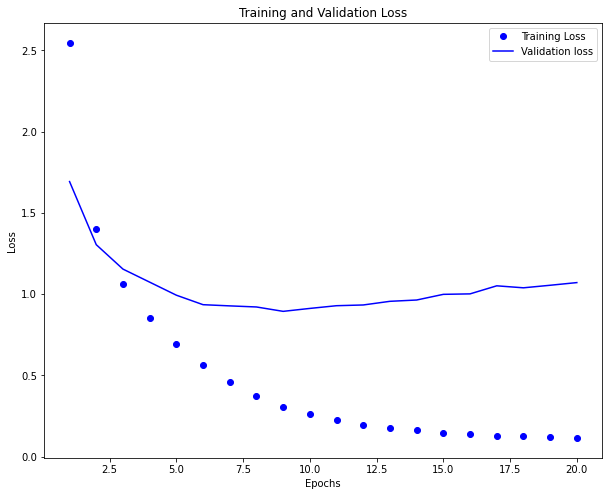

In [18]:
plt.figure(figsize=(10,8))
plt.plot(epochs, loss_values,  'bo', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

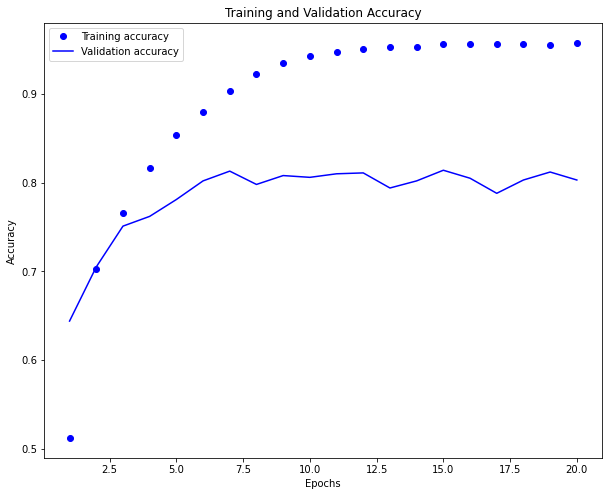

In [19]:
plt.figure(figsize=(10,8))
plt.plot(epochs, acc,  'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_X_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(X_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 51ms/step - loss: 3.0597 - accuracy: 0.4247 - val_loss: 1.7483 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 1s 31ms/step - loss: 1.5028 - accuracy: 0.6837 - val_loss: 1.3001 - val_accuracy: 0.7230
Epoch 3/9
16/16 [==============================] - 1s 32ms/step - loss: 1.0901 - accuracy: 0.7751 - val_loss: 1.1350 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 1s 32ms/step - loss: 0.8532 - accuracy: 0.8264 - val_loss: 1.0311 - val_accuracy: 0.7970
Epoch 5/9
16/16 [==============================] - 1s 31ms/step - loss: 0.6904 - accuracy: 0.8552 - val_loss: 0.9675 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 1s 32ms/step - loss: 0.5518 - accuracy: 0.8893 - val_loss: 0.9310 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 1s 32ms/step - loss: 0.4248 - accuracy: 0.9158 - val_loss: 0.9056 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [21]:
results = model.evaluate(X_test, y_test)
results

71/71 [==============================] - 0s 2ms/step - loss: 0.9928 - accuracy: 0.7898


[0.9927682876586914, 0.7898486256599426]

In [22]:
# Establishing a random classification baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18788958147818344

## 3.5.5 Generating predictions on new data

In [23]:
predictions = model.predict(X_test)

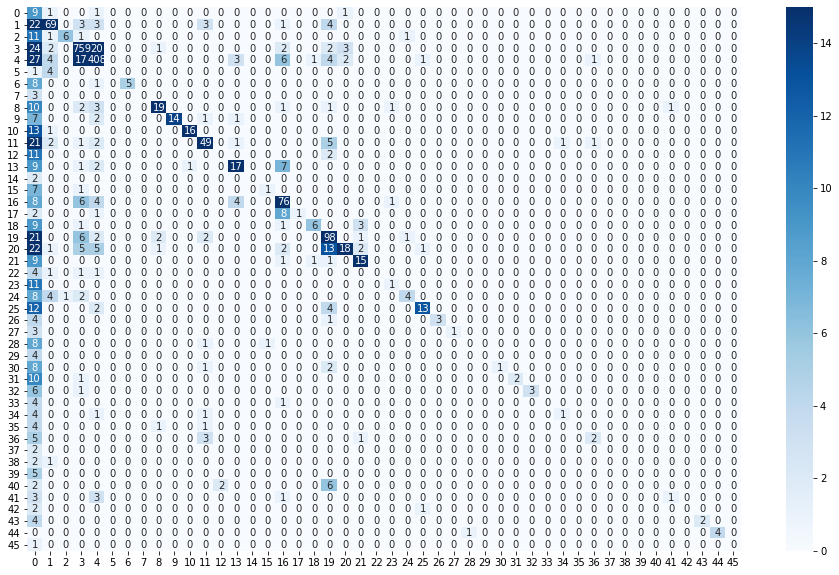

In [24]:
import sklearn.metrics as metrics
from seaborn import heatmap

confusion_matrix = metrics.confusion_matrix(y_true=y_test.argmax(axis=1), y_pred=np.round(predictions).argmax(axis=1))
fig, ax = plt.subplots(figsize=(16,10))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax, vmax=15);

In [25]:
predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

0.9999999

In [27]:
np.argmax(predictions[0])

3

## 3.5.6 A different way to handle the labels and the loss

In [28]:
y_train2 = np.array(train_labels)
y_test2 = np.array(test_labels)

In [29]:
y_val2 = y_train2[:1000]
partial_y_train2 = y_train2[1000:]

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(partial_X_train,
                    partial_y_train2,
                    epochs=9,
                    batch_size=512,
                    validation_data=(X_val, y_val2), verbose = False)
results = model.evaluate(X_test, y_test2)
results

71/71 [==============================] - 0s 2ms/step - loss: 1.0066 - acc: 0.7823


[1.0065890550613403, 0.7822796106338501]

## 3.5.7 The importance of having sufficiently large intermediate layers


71/71 [==============================] - 0s 2ms/step - loss: 2.2080 - acc: 0.6866
[2.2079992294311523, 0.6865538954734802]


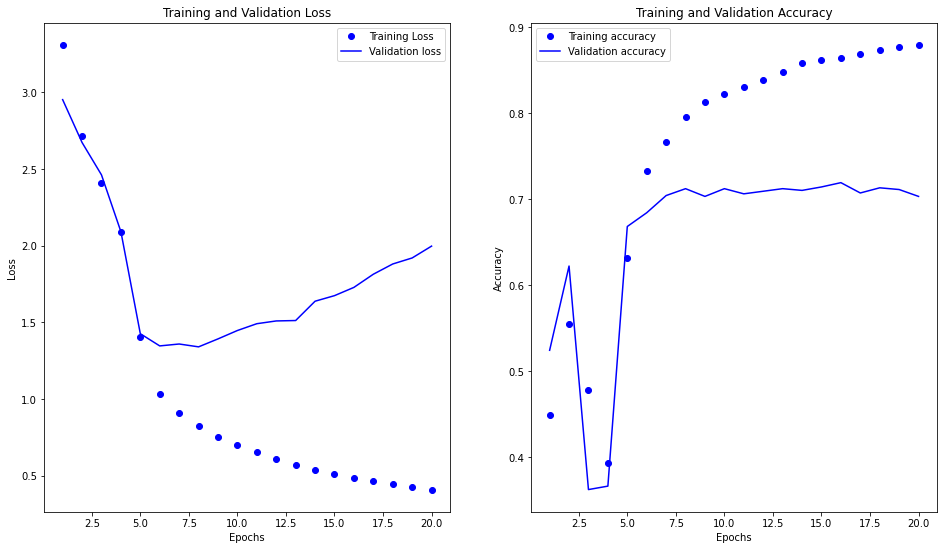

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val), 
                    verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,6))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.show()

## 3.5.8 Further experiments

Try using larger or smaller layers: 32 units, 128 units, and so on.

### 32 Units

71/71 [==============================] - 0s 2ms/step - loss: 1.4414 - acc: 0.7756
[1.4413766860961914, 0.7756010890007019]


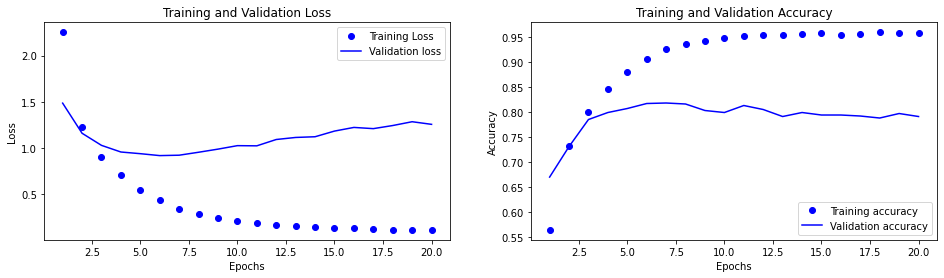

In [32]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val), 
                    verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.show()


### 128 Units

71/71 [==============================] - 0s 3ms/step - loss: 1.9608 - acc: 0.7769
[1.9607938528060913, 0.7769367694854736]


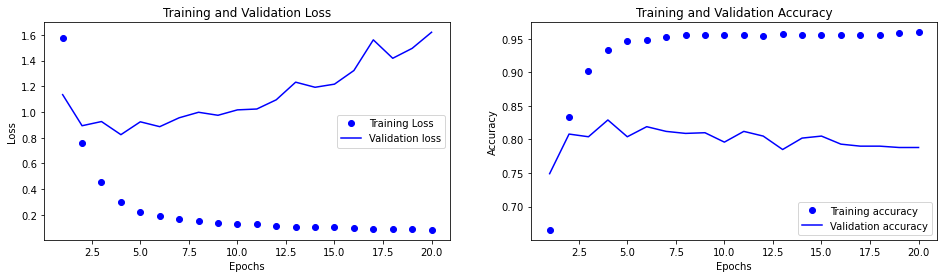

In [33]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val), 
                    verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.show()


You used two hidden layers. Now try using a single hidden layer, or three hidden layers

### 1 Hidden Layer

71/71 [==============================] - 0s 2ms/step - loss: 1.3870 - acc: 0.7823
[1.3869801759719849, 0.7822796106338501]


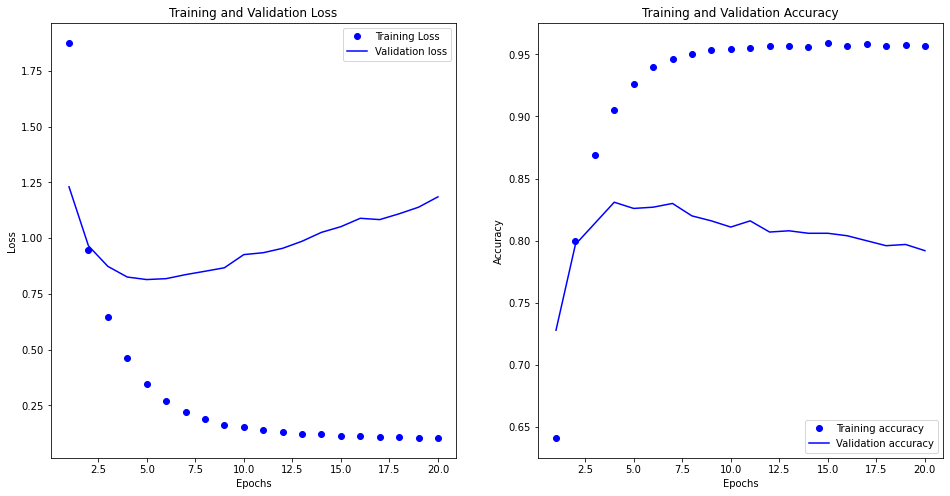

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val), 
                    verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.show()


### 3 Hidden Layers

71/71 [==============================] - 0s 2ms/step - loss: 1.8020 - acc: 0.7609
[1.8020423650741577, 0.760908305644989]


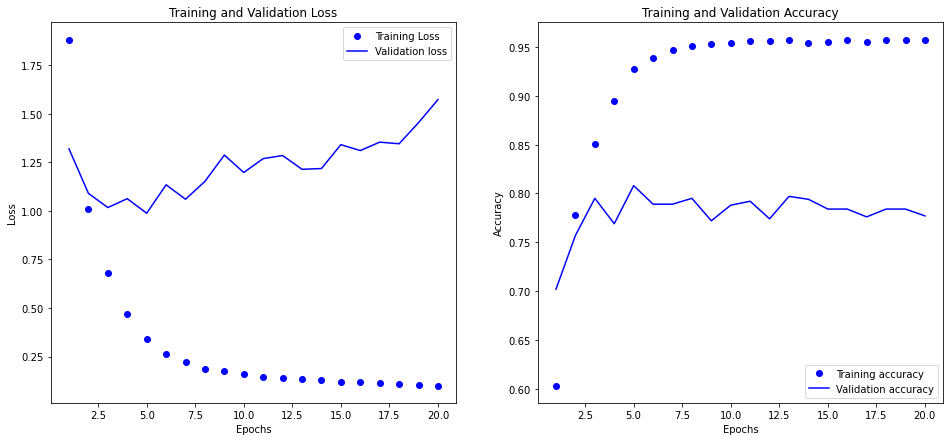

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(X_val, y_val), 
                    verbose = False)

results = model.evaluate(X_test, y_test)
print(results)

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,7))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.show()
